In [1]:
# Imports
%matplotlib qt
import mne
import os

In [6]:
# Set up paths

# This base path will need updating
base_path = 'C:\\Users\\Luyanda Mdanda\\Documents\\Research\\EEG_Dat'

# These should stay the same
#subj_dat_fname = '._3502_resampled.set'
subj_dat_fname = '3502_resampled.set'

In [7]:
# Read in subject listed above

ev_dict = {'Start Block': 1001., 'End Block': 1002.}
# event dictionary to ensure "Start Block" and "End Block"

full_path = os.path.join(base_path, subj_dat_fname)
eeg_dat = mne.io.read_raw_eeglab(full_path, event_id=ev_dict)

Events like the following will be dropped entirely: ['Label_Trough_thresh', 'Undetected_Pres_thresh', 'Fall_Pres_catch', 'Peak_Pres_thresh', 'Label_Undetected_thresh'], 39 in total
2338/3068 event codes could not be mapped to integers. Use the 'event_id' parameter to map such events manually.
Reading C:\Users\Luyanda Mdanda\Documents\Research\EEG_Dat\3502_resampled.fdt


<ipython-input-7-646bc86f3d3a>:7: RuntimeWarning: Events like the following will be dropped entirely: ['Label_Trough_thresh', 'Undetected_Pres_thresh', 'Fall_Pres_catch', 'Peak_Pres_thresh', 'Label_Undetected_thresh'], 39 in total
  eeg_dat = mne.io.read_raw_eeglab(full_path, event_id=ev_dict)
<ipython-input-7-646bc86f3d3a>:7: RuntimeWarning: 2338/3068 event codes could not be mapped to integers. Use the 'event_id' parameter to map such events manually.
  eeg_dat = mne.io.read_raw_eeglab(full_path, event_id=ev_dict)


In [8]:
eeg_dat.info

<Info | 16 non-empty fields
    bads : 'list | 0 items
    buffer_size_sec : 'float | 1.0
    ch_names : 'list | Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2
    chs : 'list | 65 items (STIM: 1, EEG: 64)
    comps : 'list | 0 items
    custom_ref_applied : 'bool | False
    dev_head_t : 'mne.transforms.Transform | 3 items
    events : 'list | 0 items
    highpass : 'float | 0.0 Hz
    hpi_meas : 'list | 0 items
    hpi_results : 'list | 0 items
    lowpass : 'float | 250.0 Hz
    meas_date : 'numpy.ndarray | 1969-12-31 16:00:00
    nchan : 'int | 65
    projs : 'list | 0 items
    sfreq : 'float | 500.0 Hz
    acq_pars : 'NoneType
    acq_stim : 'NoneType
    ctf_head_t : 'NoneType
    description : 'NoneType
    dev_ctf_t : 'NoneType
    dig : 'NoneType
    experimenter : 'NoneType
    file_id : 'NoneType
    filename : 'NoneType
    hpi_subsystem : 'NoneType
    kit_system_id : 'NoneType
    line_freq : 'NoneType
    meas_id : 'NoneType
    proj_id : 'NoneType
    proj_name : 'NoneTyp

In [9]:
eeg_dat.set_eeg_reference 
# set EEG average reference

<bound method SetChannelsMixin.set_eeg_reference of <RawEEGLAB  |  3502_resampled.fdt, n_channels x n_times : 65 x 1760157 (3520.3 sec), ~131 kB, data not loaded>>

In [10]:
# identifying all the events and IDs
mne.find_events(eeg_dat)

367 events found
Events id: [   1    2    3    5   10 1001 1002]


array([[   1820,       0,       3],
       [   1880,       0,       3],
       [   1940,       0,       5],
       ..., 
       [1741629,       0,      10],
       [1748249,       0,      10],
       [1755097,       0,    1002]], dtype=int64)

367 events found
Events id: [   1    2    3    5   10 1001 1002]
Found %s events.

event 1 missing from event_id will be ignored
event 2 missing from event_id will be ignored
event 3 missing from event_id will be ignored
event 5 missing from event_id will be ignored
event 10 missing from event_id will be ignored


<ipython-input-11-06f407bef1fb>:12: RuntimeWarning: event 1 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-11-06f407bef1fb>:12: RuntimeWarning: event 2 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-11-06f407bef1fb>:12: RuntimeWarning: event 3 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-11-06f407bef1fb>:12: RuntimeWarning: event 5 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-11-06f407bef1fb>:12: RuntimeWarning: event 10 missing from event_id will be ignored
  event_id=event_id)


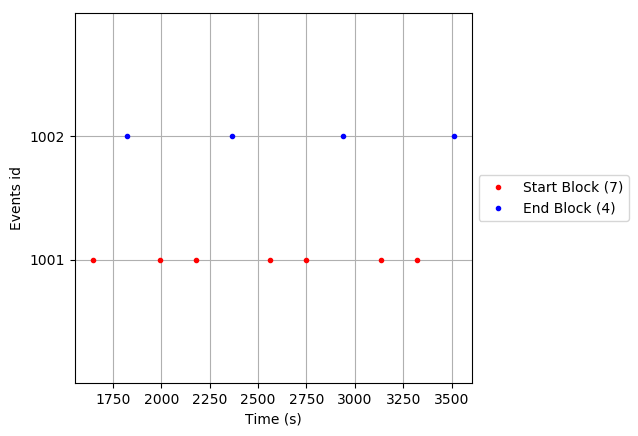

In [11]:
events = mne.find_events(eeg_dat)
print('Found %s events.')
print()

# Plot the events to get an idea of the paradigm
# Specify colors and an event_id dictionary for the legend.
# Plotting only Start and Rest Block events
event_id = {'Start Block': 1001, 'End Block': 1002}
color = {1001:'red', 1002:'blue'}

mne.viz.plot_events(events, eeg_dat.info['sfreq'], eeg_dat.first_samp, color=color,
                    event_id=event_id)

<h1> Progress Report: 22/4 </h1>
<h3>Need to work on identifying other class names. </h3>


In [4]:
mne.Epochs??

In [12]:
epochs = mne.Epochs(eeg_dat, events=events, event_id=event_id, name = "Epochs created on Start and End Events")

11 matching events found
Applying baseline correction (mode: mean)
add_eeg_ref defaults to True in 0.13, will default to False in 0.14, and will be removed in 0.15. We recommend to use add_eeg_ref=False and set_eeg_reference() instead.
Adding average EEG reference projection.
Created an SSP operator (subspace dimension = 1)


<ipython-input-12-a2c0ac2c27b0>:1: DeprecationWarning: add_eeg_ref defaults to True in 0.13, will default to False in 0.14, and will be removed in 0.15. We recommend to use add_eeg_ref=False and set_eeg_reference() instead.
  epochs = mne.Epochs(eeg_dat, events=events, event_id=event_id, name = "Epochs created on Start and End Events")


1 projection items activated


<h1> Woop woop </h1>
<h3> 11 matching events, this seems very promosing </h3>

In [13]:
epochs.plot?

Loading data for 11 events and 351 original time points ...
0 bad epochs dropped
Loading data for 11 events and 351 original time points ...


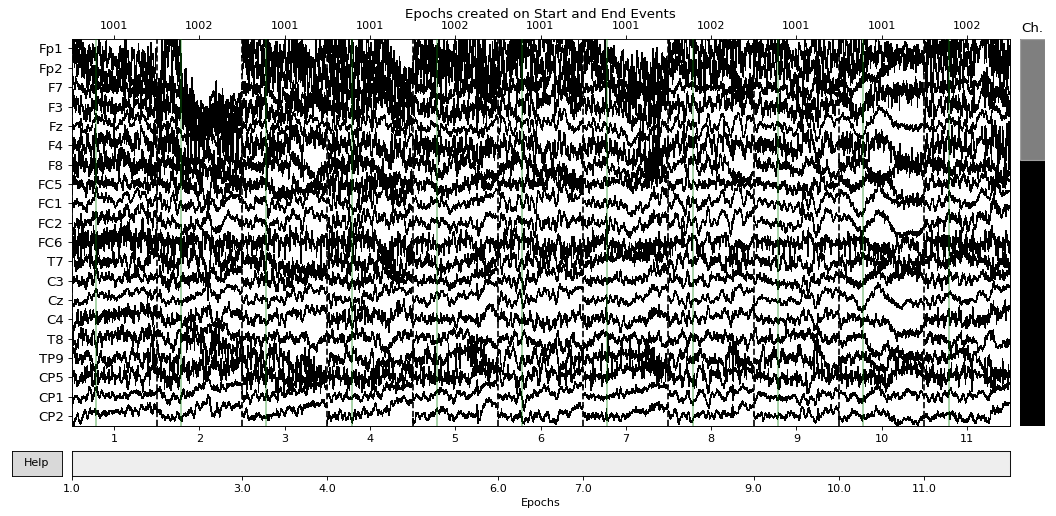

Dropped 0 epochs
Channels marked as bad: []


In [14]:
epochs.plot()